# <font color='red'>Parte 5 -  Modelos de Machine Learning</font>
Nesta etapa veremos exemplos modelos para classificar se uma pessoa tem ou não Diabetes.

O Foco desse notebook é puramente para a construção dos modelos.
###### Por: Marcus Rosa Godoi

# <font color='grey'>0.0 - IMPORTS</font>

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split                                         #MANIPULAÇÃO DOS DADOS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder                                #MANIPULAÇÃO DOS DADOS
from sklearn.preprocessing import MinMaxScaler                                               #MANIPULAÇÃO DOS DADOS

from sklearn.linear_model import LogisticRegression                                          #MODELO
from sklearn.ensemble import RandomForestClassifier                                          #MODELO

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report          #AVALIAÇÃO
from yellowbrick.classifier import ConfusionMatrix                                           #AVALIAÇÃO  
#from sklearn import metrics                                                                 #AVALIAÇÃO

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


# <font color='grey'>1.0  - COLETAS DE DADOS</font>

Prevendo a Ocorrência de Diabetes.


Conjunto de Dados do Repositório de Machine Learning da UCI / Kaggle.


https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [2]:
base1 = pd.read_csv("Dados/diabetes.csv")

In [ ]:
base1

## 1.1 - Verificação da Base de Dados

In [ ]:
# Verificando o formato dos dados

print('Número de Linhas: {}'.format(base1.shape[0]))
print('Número de Colunas: {}'.format(base1.shape[1]))

In [ ]:
# Varificando tipo dos dados

base1.dtypes

In [ ]:
# Verificando as primeiras linhas do dataset

base1.head()

In [ ]:
# Verificando as últimas linhas do dataset

base1.tail()

In [ ]:
# Verificando estatisticas básicas dos dados

base1.describe()

# <font color='grey'>2.0 - LIMPEZA DOS DADOS</font>

In [3]:
base2 = base1.copy() #Fazer uma copia da base de daods para cada etapa. 
                     #Evitando perde-la caso ocorra uma manipulação errada

## 2.1 - Valores Missing

In [4]:
# Verificando se existem valores nulos na base de dados
base2.isnull().values.any()

False

In [5]:
base2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Locanizar dados nulos pela coluna
base2.loc[pd.isnull(base2['Glucose'])]   #localizar valores Nan por coluna

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


 #### Observação:
 Neste exemplo vimos que não possui valores nulos na base de dados

## 2.2 - Valores Missing Ocultos

In [7]:
# NESTE CASO VALORE IGUAIS A ZERO PARA OS PREVISORES FORAM CONSIFDERADOS MISSING
print("# Linhas no dataframe {0}".format(len(base2)))
#print("# Linhas missing Pregnancies: {0}".format(len(base2.loc[base2['Pregnancies'] == 0])))
print("# Linhas missing Glucose: {0}".format(len(base2.loc[base2['Glucose'] == 0])))
print("# Linhas missing BloodPressure: {0}".format(len(base2.loc[base2['BloodPressure'] == 0])))
print("# Linhas missing SkinThickness: {0}".format(len(base2.loc[base2['SkinThickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(base2.loc[base2['Insulin'] == 0])))
print("# Linhas missing BMI: {0}".format(len(base2.loc[base2['BMI'] == 0])))
print("# Linhas missing DiabetesPedigreeFunction: {0}".format(len(base2.loc[base2['DiabetesPedigreeFunction'] == 0])))
print("# Linhas missing Age: {0}".format(len(base2.loc[base2['Age'] == 0])))

# Linhas no dataframe 768
# Linhas missing Glucose: 5
# Linhas missing BloodPressure: 35
# Linhas missing SkinThickness: 227
# Linhas missing insulin: 374
# Linhas missing BMI: 11
# Linhas missing DiabetesPedigreeFunction: 0
# Linhas missing Age: 0


## 2.3 - Tratando Dados Missing

 A estratégia adotada foi a de substituir os valores iguais a zero pela média das colunas.
 
 Destacado em vermelho.
 
 Mais de uma delas pode ser realizada dependendo da situação.

#### Substituindo os valores missing, pela média dos dados

In [ ]:
base = base.fillna(base.mean())

#### <font color='red'>Substituindo os valores iguais a zero, pela média dos dados (MISSING OCULTOS)</font>

In [8]:
base2.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [9]:
colunas = list(base2.columns)
medias = list(base2.mean())

In [10]:
for c,m in zip(colunas,medias):
    if (c == 'Outcome')| (c == 'Pregnancies'):
        continue
    for x,i in zip(base2[c], range(base2.shape[0])):
        if (x==0):
            base2.loc[i,c]=m

In [11]:
base2.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

#### APAGANDO DADOS DE MISSING

In [ ]:
base = base.dropna('Glucose', axis = 0)  #AXIS = 0 APAGA A LINHA
#Neste caso apaga todaas as linhas com valores nulos(missing)

#### APAGANDO DADOS DE MISSING OCULTOS

In [ ]:
i1 = base.loc[base.Glucose == 10] #loc -> localizar (i1 = inconsistentes um)
base = base[base.Glucose > 0] #A BASE DE DADOS AGORA SO POSSUIRÁ OS DADOS ONDE A GLICOSE É MAIOR QUE ZERO 

#### ALTERANDO  DADOS MISSING CATEGORICOS

Não Ocorre neste caso, mas para exemplo 

In [ ]:
# Varialvel categorica, caso não for apaga-la

base['vehicleType'].value_counts() # verificar qual item mais se repete para poder tratar depois ->limousine
#Fazer para todas as colunas que tiverem valores categóricos nulos 

valores = {'vehicleType': 'limousine', 
           'gearbox': 'manuell',
           'model': 'golf', 
           'fuelType': 'benzin',
           'notRepairedDamage': 'nein'}

#NOME DA COLUNA : VALOR QUE MAIS SE REPETE NESSA COLUNA

In [ ]:
base = base.fillna(value = valores)
#tocamos os valorers nulos pelos valores que mais se repetiram

## 2.4 - Outliers

 Detectar outliers usando boxplot.
 Neste caso vamos considerar que os outiliers prejudicam o modelo. 

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(data = base2)

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(data = base2['SkinThickness'])

## 2.5 - Tratamento de Outliers

#### Substituindo os outliers, pela média dos dados.

Apenas para exemplo.

In [ ]:
base2_2 = base2.copy()

In [ ]:
d = base2_2.describe()
q1 = d.iloc[4,3] #primeiro quartil - " SkinThickness "
q3 = d.iloc[6,3] #terceiro quartil - " SkinThickness "
iqr = q3 - q1    #Intervalo Interquartil
minimo = q1 - (1.5 * iqr)
maximo = q3 + (1.5 * iqr)

In [ ]:
media = base2_2['SkinThickness'] .mean()
media

In [ ]:
for x,i in zip(base2_2['SkinThickness'], range(base2_2.shape[0])):
    if (x < minimo) | (x > maximo):
        base2_2.loc[i,'SkinThickness'] = media

In [ ]:
base2_2.loc[0,'SkinThickness']

In [ ]:
base2_2.head()

In [ ]:
base2_2['SkinThickness'].max()

#### Apagando os outliers

In [ ]:
base2_3 = base2.copy()

In [ ]:
d = base2_3.describe()
q1 = d.iloc[4,3] #primeiro quartil - " SkinThickness "
q3 = d.iloc[6,3] #terceiro quartil - " SkinThickness "
iqr = q3 - q1    #Intervalo Interquartil
minimo = q1 - (1.5 * iqr)
maximo = q3 + (1.5 * iqr)

In [ ]:
outliers = base2_3[(base2_3['SkinThickness']>maximo)|(base2_3['SkinThickness']<minimo)]
outliers

In [ ]:
outliers.index

In [ ]:
base2_3 = base2_3.drop(outliers.index)

In [ ]:
base2_3.shape

#### <font color='grey'>Substituindo os outliers usando transformação logarítmica. /font>

## 2.6 - Apagar Colunas

In [ ]:
# Lista todas as colunas
list(base2)

In [ ]:
nome_coluna = base.NomeDaColuna  #salvar essa coluna caso seja necessário
base = base.drop('NomeDaColuna', axis = 1)     #AXIS = 1 APAGA A COLUNA

# <font color='grey'>3.0  - EXPLORAÇÃO DOS DADOS</font>

In [12]:
 base3 = base2.copy()

## 3.1 - Visualização de Estatísticas Básicas

In [ ]:
base3.describe()

## 3.2 - Listar Nomes das Colunas (Atributos)

In [ ]:
# Lista todas as colunas
list(base3)

'Pregnancies', Number of times pregnant

 'Glucose', Plasma glucose concentration a 2 hours in an oral glucose tolerance test

 'Blood Pressure',Diastolic blood pressure (mm Hg)

 'Skin Thickness', Triceps skin fold thickness (mm)

 'Insulin', 2-Hour serum insulin (mu U/ml)

 'BMI',  Body mass index (weight in kg/(height in m)^2)

 'Diabetes Pedigree Function', Diabetes pedigree function

 'Age', Age (years)

 'Outcome' Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 3.3 - Verificar Distribuição da Classe

In [ ]:
# Verificando como os dados estão distribuídos
num_true = len(base1.loc[base1['Outcome'] == True])
num_false = len(base1.loc[base1['Outcome'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

## 3.4 - Correlação

In [ ]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(base3, size=12):
    corr = base3.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

In [ ]:
# Criando o gráfico
plot_corr(base3)

In [ ]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
base3.corr()

## 3.5 - Verificar/ Visualizar a  Distribuição/Relação entre os Atributos

### 3.5.1 - Histogramas

In [ ]:
base3.hist(bins=10, figsize=(20,15))
plt.show()

In [ ]:
#Densidade
plt.figure(1,figsize=(18,10))
plt.subplot(3,3,1)#linhas, colunas, nºdo grafico
sns.distplot(base3.iloc[:,0], hist = True, kde = True, bins = 20, color = 'blue',hist_kws={'edgecolor': 'black'})

plt.subplot(3,3,2)
sns.distplot(base3.iloc[:,1], hist = True, kde = True, bins = 20, color = 'blue',hist_kws={'edgecolor': 'black'})

plt.subplot(3,3,3)
sns.distplot(base3.iloc[:,2], hist = True, kde = True, bins = 20, color = 'blue',hist_kws={'edgecolor': 'black'})

plt.subplot(3,3,4)
sns.distplot(base3.iloc[:,3], hist = True, kde = True, bins = 20, color = 'blue',hist_kws={'edgecolor': 'black'})

plt.subplot(3,3,5)
sns.distplot(base3.iloc[:,4], hist = True, kde = True, bins = 20, color = 'blue',hist_kws={'edgecolor': 'black'})

plt.subplot(3,3,6)
sns.distplot(base3.iloc[:,5], hist = True, kde = True, bins = 20, color = 'blue',hist_kws={'edgecolor': 'black'})

plt.subplot(3,3,7)
sns.distplot(base3.iloc[:,6], hist = True, kde = True, bins = 20, color = 'blue',hist_kws={'edgecolor': 'black'})

plt.subplot(3,3,8)
sns.distplot(base3.iloc[:,7], hist = True, kde = True, bins = 20, color = 'blue',hist_kws={'edgecolor': 'black'})

plt.subplot(3,3,9)
sns.distplot(base3.iloc[:,8], hist = True, kde = True, bins = 20, color = 'blue',hist_kws={'edgecolor': 'black'})

plt.tight_layout()


### 3.5.2 - Idade x Número de gravidez

In [ ]:
#Qual a relação entre idade e número que as mulhres engravidam?
# A idade das mulheres afeta a quantidade de vezes que engravidam.

plt.figure(1,figsize=(18,10))

x = base3.Age
y = base3.Pregnancies

#Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Número de gravidez")
plt.title("Idade x Número de gravidez")
plt.show()



### 3.5.3 - Idade x Pressão Arterial

In [ ]:
#Qual a relação entre idade e a pressão arterial?
# A idade das mulheres afeta a pressão.

plt.figure(1,figsize=(18,10))

x = base3.Age
y = base3.BloodPressure

#Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Pressão Arterial")
plt.title("Idade x Pressão Arterial")
plt.show()


### 3.5.4 - Insulina x Glicose

In [ ]:
#Qual a relação entre insulina e a pressão arterial?
# A insulna das mulheres afeta a glicose.

plt.figure(1,figsize=(18,10))

x = base3.Insulin
y = base3.Glucose

#Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Glicose")
plt.ylabel("Insulina")
plt.title("Insulina x Glicose")
plt.show()

### 3.5.5- IMC x Espessura da pele


In [ ]:
#Qual a relação entre o IMC e a Espessura da pele?
# A Espessura da pele das mulheres afeta o IMC.

plt.figure(1,figsize=(18,10))

x = base3.BMI
y = base3.SkinThickness

#Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '-', color = "red")
plt.scatter(x, y, color = 'blue', facecolors = 'none', marker = '*')

plt.xlabel('IMC')
plt.ylabel('Espessura da pele')
plt.title('IMC x Espessura da pele')
plt.show()

# <font color='grey'>4.0 - MODELAGEM DOS DADOS</font>

In [138]:
base4 = base3.copy()

In [ ]:
base4.head()

## 4.1 - Verificar Distribuição da Classe

O ideal seria valores iguais para cada classe.

In [14]:
base4['Outcome'].value_counts() #contagem do atributo classe## 3.3 - Virificar Distribuição da Classe

0    500
1    268
Name: Outcome, dtype: int64

Como possui pucos dados vamos primeiramente deixar essa mesma distribuição.

Caso os resultados não forem bons uma possibilidade igualar a quantidade de itens da claase=0 e da classe=1

### 4.1.1 - Selecionando dados das Classes
Evitar o acontecimento de classes raras.

In [15]:
q = 268  #Quantdade de itens por classes

amostra0 = base4.loc[base4.Outcome == 0] #pega todos os itens com a classe igual a zero
amostra1 = base4.loc[base4.Outcome == 1] #pega todos os itens com a classe igual a um

In [16]:
amostra0 = amostra0.sample(q) #pega uma amostra dos itens com a classe igual a zero, com a quantidade especificada.
amostra1 = amostra1.sample(q) #pega uma amostra dos itens com a classe igual a um, com a quantidade especificada.

In [17]:
base41 = pd.concat([amostra0,amostra1]) #concatenar a base de dados classes=0 e classes=1

In [18]:
base41 = base41.sort_index() #ordenar a base pelo index novamente, para que os valores sequenciados não gerem algum vício.

In [19]:
base41.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [20]:
base41.shape

(536, 9)

In [21]:
base41['Outcome'].value_counts() #contagem do atributo classe## 3.3 - Virificar Distribuição da Classe

1    268
0    268
Name: Outcome, dtype: int64

## <font color='grey'>4.2 - Remover colunas desnecessárias. </font>

In [ ]:
#Remover coluna da base de dados
base = base.drop('NomeDaColuna', axis = 1) #axis =1 significa a coluna toda

## 4.3 - Separar a Base de Dados em Atributos e Classes

In [185]:
#SEPARA EM ATRIBUTOS E CLASSES
previsores = base4.iloc[:,0:8].values   #.values converte para valores numpy // colunas de 0 a 6
classe = base4.iloc[:,8].values         #.values converte para valores numpy // coluna 8

## <font color='grey'> 4.4 - Transformar Atributos Categóricos para Numéricos </font>

Exemplo.

In [ ]:
#transformar atributos categoricos para numericos

labelEncoder = LabelEncoder() 
previsores[:,0] = labelEncoder.fit_transform(previsores[:,0])
previsores[:,1] = labelEncoder.fit_transform(previsores[:,1])
previsores[:,3] = labelEncoder.fit_transform(previsores[:,3])


# 0 0 0 4
# 2 0 1 0
# 3 0 0 1

In [ ]:
#Atributos  -- DUMMY

onehotencoder = OneHotEncoder(categorical_features = [0,1,3,5,8,9,10])
previsores = onehotencoder.fit_transform(previsores).toarray()

#Gera varius outros atributos com essas caracteristicas
#atr 1  1 0 0
#atr 2  0 1 0
#atr 3  0 0 1

## <font color='grey'> 4.5 - Transformar Classes Categóricas para Numéricos (Classe Binária) </font>

Exemplo.

In [ ]:
# Definindo as classes BINARIAS ESTANDO CATEGORICA(NESSE CASO BOOL para numérico)

diabetes_map = {True : 1, False : 0}

# Aplicando o mapeamento ao dataset
base['diabetes'] = base['diabetes'].map(diabetes_map)

# Verificando as primeiras linhas do dataset
df.head(5)

## <font color='grey'> 4.6 - Transformar Classes Categóricas para Numéricos(Multiplas Classes) </font>

Exemplo.

In [ ]:
#CONVERTER  AS SAIDAS CATEGORICAS PARA NUMERICAS - KERAS
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe) #TANSFORMA EM NUMEROS 1 2 3
classe_dummy = np_utils.to_categorical(classe) #TRANSFORMA EM BINARIOS 
# iris setosa     1 0 0
# iris virginica  0 1 0
# iris versicolor 0 0 1

##  4.7 - Dividir Base de Dados em Treino e Teste

In [186]:
#DIVIDIR DADOS EM TREINAMENTO E TESTE
#Realizar testes com uma divisão 80% treino e 20% teste (base de dados pequena)
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

#x sao as entradas
#y sao as saidas

##  4.8 - Normalizar Variáveis

In [187]:
#NORMALIZADOR DE VARIAVEIS
normalizador = MinMaxScaler(feature_range=(0,1)) #NORMALIZAÇÃO DOS VALORES 
x_treino = normalizador.fit_transform(x_treino)

#USADO PARA FAZER PREVISÃO
#base_teste_normalizada = normalizador.transform(x_teste) #NAO USA O FIT_TRANSFORM POIS QUERO USAR A MESMA NORMALIZAÇÃO
#USADO PARA VISUALIZAR OS DADOS SEM A NORMALIZAÇÃO
#previsoes = normalizador.inverse_transform(previsoes) #REMOBVER A NORMALIZAÇÃO

# <font color='red'>5.0 - MODELO</font>

In [188]:
base5 = base4.copy()

## 5.0 Reset de Variáveis
Caso ocorra algo com as variaveis de teste e treino basta resetá-las aqui.

In [212]:
x_treino1, y_treino1, y_teste1 = x_treino, y_treino, y_teste

In [213]:
x_treino2, y_treino2, y_teste2 = x_treino, y_treino, y_teste

In [214]:
x_treino3, y_treino3, y_teste3 = x_treino, y_treino, y_teste

## 5.1 Modelo 1 - Regressão Logística

In [201]:
# Criando o modelo preditivo usando SCIKIT-LEARN
modelo1 = LogisticRegression(C = 0.1, 
                             max_iter = 100000000,
                             tol=0.000001)

# Treinando o modelo
modelo1.fit(x_treino1, y_treino1.ravel())

C:\Users\marcu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 5.1.1 - Previsão

In [262]:
# Verificando nos dados de teste
x_teste1 = normalizador.transform(x_teste) #NAO USA O FIT_TRANSFORM POIS QUERO USAR A MESMA NORMALIZAÇÃO

previsao1 = modelo1.predict(x_teste1)

In [192]:
previsao1

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 5.1.2 - Métricas

In [205]:
print("Taxa de Acerto (Accuracy): {0:.6f}%".format(accuracy_score(y_teste1, previsao1)*100))

Taxa de Acerto (Accuracy): 76.190476%


In [208]:
print("Classification Report")
print(metrics.classification_report(y_teste1, previsao1, labels = [1, 0]));

Classification Report
              precision    recall  f1-score   support

           1       0.85      0.31      0.46        74
           0       0.75      0.97      0.85       157

    accuracy                           0.76       231
   macro avg       0.80      0.64      0.65       231
weighted avg       0.78      0.76      0.72       231



In [196]:
# Criando uma Confusion Matrix
print("Confusion Matrix")
confusao1 = confusion_matrix(y_teste1, previsao1)
confusao1

Confusion Matrix


array([[153,   4],
       [ 51,  23]], dtype=int64)

### 5.1.3 - Avaliação

Problemas para classificar a classe igual a Positiva(1). Provavelmente por ter muito menos resultados positivos

## 5.2 Modelo 2 - Random Forest

In [217]:
# Criando o modelo preditivo usando SCIKIT-LEARN
modelo2 = RandomForestClassifier(random_state = 42)

# Treinando o modelo
modelo2.fit(x_treino2, y_treino2.ravel())

C:\Users\marcu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### 5.2.1 - Previsão

In [219]:
# Verificando nos dados de teste
x_teste2 = normalizador.transform(x_teste) #NAO USA O FIT_TRANSFORM POIS QUERO USAR A MESMA NORMALIZAÇÃO

previsao2 = modelo2.predict(x_teste2)

In [220]:
previsao2

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

### 5.2.2 - Métricas

In [221]:
print("Taxa de Acerto (Accuracy): {0:.6f}%".format(accuracy_score(y_teste2, previsao2)*100))

Taxa de Acerto (Accuracy): 75.324675%


In [222]:
print("Classification Report")
print(metrics.classification_report(y_teste2, previsao2, labels = [1, 0]));

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.51      0.57        74
           0       0.79      0.87      0.83       157

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



In [223]:
# Criando uma Confusion Matrix
print("Confusion Matrix")
confusao2 = confusion_matrix(y_teste2, previsao2)
confusao2

Confusion Matrix


array([[136,  21],
       [ 36,  38]], dtype=int64)

### 5.2.3 - Avaliação

Problemas para classificar a classe igual a Positiva(1). Provavelmente por ter muito menos resultados positivos

## 5.3 Modelo 3 - Rede Neural Artificial

In [226]:
# Criando o modelo preditivo usando KERAS
modelo3 = Sequential()  #uma camada apos a outra

modelo3.add(Dense(units = 5, activation = 'relu', input_dim = 8)) #5 camadas ocultas + 8 entrada
modelo3.add(Dropout(0.2))

modelo3.add(Dense(units = 5,  activation = 'relu'))# camada de oculta 2
modelo3.add(Dropout(0.2))

modelo3.add(Dense(units = 1, activation = 'sigmoid')) #camada de saida

In [227]:
modelo3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [229]:
#Classificação Binária
modelo3.compile(optimizer = 'adam', 
                      loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

In [230]:
# Treinar Modelo
x_teste3 = normalizador.transform(x_teste) #NAO USA O FIT_TRANSFORM POIS QUERO USAR A MESMA NORMALIZAÇÃO
historico3 = modelo3.fit(x_treino3, 
                       y_treino3, 
                       epochs = 1000, 
                       validation_data = (x_teste3, y_teste3))

Train on 537 samples, validate on 231 samples
Epoch 1/1000
537/537 [==============================] - 5s 10ms/step - loss: 0.6910 - binary_accuracy: 0.6145 - val_loss: 0.6912 - val_binary_accuracy: 0.6667
Epoch 2/1000
537/537 [==============================] - 0s 189us/step - loss: 0.6857 - binary_accuracy: 0.6611 - val_loss: 0.6876 - val_binary_accuracy: 0.6710
Epoch 3/1000
537/537 [==============================] - 0s 191us/step - loss: 0.6827 - binary_accuracy: 0.6611 - val_loss: 0.6846 - val_binary_accuracy: 0.6710
Epoch 4/1000
537/537 [==============================] - 0s 225us/step - loss: 0.6826 - binary_accuracy: 0.6462 - val_loss: 0.6797 - val_binary_accuracy: 0.6840
Epoch 5/1000
537/537 [==============================] - 0s 223us/step - loss: 0.6784 - binary_accuracy: 0.6518 - val_loss: 0.6757 - val_binary_accuracy: 0.6883
Epoch 6/1000
537/537 [==============================] - 0s 215us/step - loss: 0.6768 - binary_accuracy: 0.6462 - val_loss: 0.6712 - val_binary_accuracy: 0.

Epoch 52/1000
537/537 [==============================] - 0s 182us/step - loss: 0.5667 - binary_accuracy: 0.7225 - val_loss: 0.5198 - val_binary_accuracy: 0.7662
Epoch 53/1000
537/537 [==============================] - 0s 171us/step - loss: 0.5676 - binary_accuracy: 0.7281 - val_loss: 0.5195 - val_binary_accuracy: 0.7619
Epoch 54/1000
537/537 [==============================] - 0s 165us/step - loss: 0.5454 - binary_accuracy: 0.7486 - val_loss: 0.5197 - val_binary_accuracy: 0.7662
Epoch 55/1000
537/537 [==============================] - 0s 169us/step - loss: 0.5478 - binary_accuracy: 0.7244 - val_loss: 0.5156 - val_binary_accuracy: 0.7619
Epoch 56/1000
537/537 [==============================] - 0s 176us/step - loss: 0.5549 - binary_accuracy: 0.7169 - val_loss: 0.5153 - val_binary_accuracy: 0.7662
Epoch 57/1000
537/537 [==============================] - 0s 175us/step - loss: 0.5804 - binary_accuracy: 0.7188 - val_loss: 0.5162 - val_binary_accuracy: 0.7662
Epoch 58/1000
537/537 [===========

Epoch 103/1000
537/537 [==============================] - 0s 182us/step - loss: 0.5218 - binary_accuracy: 0.7318 - val_loss: 0.4961 - val_binary_accuracy: 0.7706
Epoch 104/1000
537/537 [==============================] - 0s 169us/step - loss: 0.5085 - binary_accuracy: 0.7635 - val_loss: 0.4941 - val_binary_accuracy: 0.7792
Epoch 105/1000
537/537 [==============================] - 0s 176us/step - loss: 0.5497 - binary_accuracy: 0.7281 - val_loss: 0.4941 - val_binary_accuracy: 0.7662
Epoch 106/1000
537/537 [==============================] - 0s 173us/step - loss: 0.5161 - binary_accuracy: 0.7505 - val_loss: 0.4954 - val_binary_accuracy: 0.7749
Epoch 107/1000
537/537 [==============================] - 0s 178us/step - loss: 0.5207 - binary_accuracy: 0.7523 - val_loss: 0.4944 - val_binary_accuracy: 0.7662
Epoch 108/1000
537/537 [==============================] - 0s 167us/step - loss: 0.5185 - binary_accuracy: 0.7486 - val_loss: 0.4933 - val_binary_accuracy: 0.7662
Epoch 109/1000
537/537 [====

537/537 [==============================] - 0s 173us/step - loss: 0.5088 - binary_accuracy: 0.7561 - val_loss: 0.4879 - val_binary_accuracy: 0.7489
Epoch 154/1000
537/537 [==============================] - 0s 167us/step - loss: 0.5017 - binary_accuracy: 0.7542 - val_loss: 0.4880 - val_binary_accuracy: 0.7532
Epoch 155/1000
537/537 [==============================] - 0s 173us/step - loss: 0.4887 - binary_accuracy: 0.7709 - val_loss: 0.4871 - val_binary_accuracy: 0.7619
Epoch 156/1000
537/537 [==============================] - 0s 206us/step - loss: 0.4968 - binary_accuracy: 0.7654 - val_loss: 0.4868 - val_binary_accuracy: 0.7576
Epoch 157/1000
537/537 [==============================] - 0s 201us/step - loss: 0.4902 - binary_accuracy: 0.7784 - val_loss: 0.4857 - val_binary_accuracy: 0.7576
Epoch 158/1000
537/537 [==============================] - 0s 186us/step - loss: 0.5082 - binary_accuracy: 0.7523 - val_loss: 0.4851 - val_binary_accuracy: 0.7532
Epoch 159/1000
537/537 [===================

Epoch 204/1000
537/537 [==============================] - 0s 182us/step - loss: 0.4819 - binary_accuracy: 0.7486 - val_loss: 0.4819 - val_binary_accuracy: 0.7489
Epoch 205/1000
537/537 [==============================] - 0s 176us/step - loss: 0.5092 - binary_accuracy: 0.7505 - val_loss: 0.4802 - val_binary_accuracy: 0.7532
Epoch 206/1000
537/537 [==============================] - 0s 178us/step - loss: 0.5126 - binary_accuracy: 0.7300 - val_loss: 0.4794 - val_binary_accuracy: 0.7532
Epoch 207/1000
537/537 [==============================] - 0s 182us/step - loss: 0.5092 - binary_accuracy: 0.7337 - val_loss: 0.4804 - val_binary_accuracy: 0.7576
Epoch 208/1000
537/537 [==============================] - 0s 173us/step - loss: 0.4888 - binary_accuracy: 0.7505 - val_loss: 0.4803 - val_binary_accuracy: 0.7532
Epoch 209/1000
537/537 [==============================] - 0s 180us/step - loss: 0.4853 - binary_accuracy: 0.7616 - val_loss: 0.4805 - val_binary_accuracy: 0.7532
Epoch 210/1000
537/537 [====

537/537 [==============================] - 0s 180us/step - loss: 0.5145 - binary_accuracy: 0.7412 - val_loss: 0.4764 - val_binary_accuracy: 0.7576
Epoch 255/1000
537/537 [==============================] - 0s 178us/step - loss: 0.4993 - binary_accuracy: 0.7412 - val_loss: 0.4769 - val_binary_accuracy: 0.7532
Epoch 256/1000
537/537 [==============================] - 0s 173us/step - loss: 0.4713 - binary_accuracy: 0.7542 - val_loss: 0.4765 - val_binary_accuracy: 0.7619
Epoch 257/1000
537/537 [==============================] - 0s 188us/step - loss: 0.4994 - binary_accuracy: 0.7393 - val_loss: 0.4760 - val_binary_accuracy: 0.7619
Epoch 258/1000
537/537 [==============================] - 0s 202us/step - loss: 0.4739 - binary_accuracy: 0.7616 - val_loss: 0.4780 - val_binary_accuracy: 0.7532
Epoch 259/1000
537/537 [==============================] - 0s 184us/step - loss: 0.4783 - binary_accuracy: 0.7561 - val_loss: 0.4765 - val_binary_accuracy: 0.7619
Epoch 260/1000
537/537 [===================

Epoch 305/1000
537/537 [==============================] - 0s 215us/step - loss: 0.4816 - binary_accuracy: 0.7486 - val_loss: 0.4718 - val_binary_accuracy: 0.7706
Epoch 306/1000
537/537 [==============================] - 0s 180us/step - loss: 0.4707 - binary_accuracy: 0.7467 - val_loss: 0.4729 - val_binary_accuracy: 0.7706
Epoch 307/1000
537/537 [==============================] - 0s 169us/step - loss: 0.4879 - binary_accuracy: 0.7598 - val_loss: 0.4718 - val_binary_accuracy: 0.7706
Epoch 308/1000
537/537 [==============================] - 0s 175us/step - loss: 0.4856 - binary_accuracy: 0.7374 - val_loss: 0.4710 - val_binary_accuracy: 0.7792
Epoch 309/1000
537/537 [==============================] - 0s 189us/step - loss: 0.4874 - binary_accuracy: 0.7430 - val_loss: 0.4724 - val_binary_accuracy: 0.7706
Epoch 310/1000
537/537 [==============================] - 0s 176us/step - loss: 0.4936 - binary_accuracy: 0.7505 - val_loss: 0.4716 - val_binary_accuracy: 0.7662
Epoch 311/1000
537/537 [====

537/537 [==============================] - 0s 178us/step - loss: 0.4837 - binary_accuracy: 0.7449 - val_loss: 0.4765 - val_binary_accuracy: 0.7662
Epoch 356/1000
537/537 [==============================] - 0s 175us/step - loss: 0.4721 - binary_accuracy: 0.7616 - val_loss: 0.4746 - val_binary_accuracy: 0.7706
Epoch 357/1000
537/537 [==============================] - 0s 178us/step - loss: 0.4759 - binary_accuracy: 0.7449 - val_loss: 0.4753 - val_binary_accuracy: 0.7662
Epoch 358/1000
537/537 [==============================] - 0s 176us/step - loss: 0.4661 - binary_accuracy: 0.7542 - val_loss: 0.4764 - val_binary_accuracy: 0.7662
Epoch 359/1000
537/537 [==============================] - 0s 189us/step - loss: 0.4965 - binary_accuracy: 0.7244 - val_loss: 0.4783 - val_binary_accuracy: 0.7662
Epoch 360/1000
537/537 [==============================] - 0s 201us/step - loss: 0.4746 - binary_accuracy: 0.7784 - val_loss: 0.4762 - val_binary_accuracy: 0.7662
Epoch 361/1000
537/537 [===================

Epoch 406/1000
537/537 [==============================] - 0s 189us/step - loss: 0.4841 - binary_accuracy: 0.7486 - val_loss: 0.4794 - val_binary_accuracy: 0.7619
Epoch 407/1000
537/537 [==============================] - 0s 171us/step - loss: 0.4809 - binary_accuracy: 0.7598 - val_loss: 0.4806 - val_binary_accuracy: 0.7619
Epoch 408/1000
537/537 [==============================] - 0s 167us/step - loss: 0.4699 - binary_accuracy: 0.7505 - val_loss: 0.4790 - val_binary_accuracy: 0.7706
Epoch 409/1000
537/537 [==============================] - 0s 169us/step - loss: 0.4790 - binary_accuracy: 0.7467 - val_loss: 0.4807 - val_binary_accuracy: 0.7662
Epoch 410/1000
537/537 [==============================] - 0s 173us/step - loss: 0.4679 - binary_accuracy: 0.7561 - val_loss: 0.4827 - val_binary_accuracy: 0.7576
Epoch 411/1000
537/537 [==============================] - 0s 173us/step - loss: 0.4729 - binary_accuracy: 0.7542 - val_loss: 0.4827 - val_binary_accuracy: 0.7532
Epoch 412/1000
537/537 [====

537/537 [==============================] - 0s 184us/step - loss: 0.4670 - binary_accuracy: 0.7523 - val_loss: 0.4808 - val_binary_accuracy: 0.7619
Epoch 457/1000
537/537 [==============================] - 0s 230us/step - loss: 0.4574 - binary_accuracy: 0.7579 - val_loss: 0.4817 - val_binary_accuracy: 0.7619
Epoch 458/1000
537/537 [==============================] - 0s 204us/step - loss: 0.4668 - binary_accuracy: 0.7561 - val_loss: 0.4812 - val_binary_accuracy: 0.7619
Epoch 459/1000
537/537 [==============================] - 0s 197us/step - loss: 0.4704 - binary_accuracy: 0.7523 - val_loss: 0.4809 - val_binary_accuracy: 0.7619
Epoch 460/1000
537/537 [==============================] - 0s 169us/step - loss: 0.4700 - binary_accuracy: 0.7523 - val_loss: 0.4829 - val_binary_accuracy: 0.7576
Epoch 461/1000
537/537 [==============================] - 0s 175us/step - loss: 0.4540 - binary_accuracy: 0.7523 - val_loss: 0.4830 - val_binary_accuracy: 0.7576
Epoch 462/1000
537/537 [===================

Epoch 507/1000
537/537 [==============================] - 0s 182us/step - loss: 0.4571 - binary_accuracy: 0.7598 - val_loss: 0.4825 - val_binary_accuracy: 0.7576
Epoch 508/1000
537/537 [==============================] - 0s 184us/step - loss: 0.4465 - binary_accuracy: 0.7486 - val_loss: 0.4827 - val_binary_accuracy: 0.7576
Epoch 509/1000
537/537 [==============================] - 0s 176us/step - loss: 0.4702 - binary_accuracy: 0.7486 - val_loss: 0.4831 - val_binary_accuracy: 0.7576
Epoch 510/1000
537/537 [==============================] - 0s 184us/step - loss: 0.4648 - binary_accuracy: 0.7691 - val_loss: 0.4828 - val_binary_accuracy: 0.7619
Epoch 511/1000
537/537 [==============================] - 0s 184us/step - loss: 0.4546 - binary_accuracy: 0.7523 - val_loss: 0.4843 - val_binary_accuracy: 0.7576
Epoch 512/1000
537/537 [==============================] - 0s 171us/step - loss: 0.4517 - binary_accuracy: 0.7430 - val_loss: 0.4858 - val_binary_accuracy: 0.7576
Epoch 513/1000
537/537 [====

537/537 [==============================] - 0s 199us/step - loss: 0.4539 - binary_accuracy: 0.7672 - val_loss: 0.4838 - val_binary_accuracy: 0.7576
Epoch 558/1000
537/537 [==============================] - 0s 169us/step - loss: 0.4714 - binary_accuracy: 0.7486 - val_loss: 0.4835 - val_binary_accuracy: 0.7532
Epoch 559/1000
537/537 [==============================] - 0s 178us/step - loss: 0.4673 - binary_accuracy: 0.7486 - val_loss: 0.4848 - val_binary_accuracy: 0.7576
Epoch 560/1000
537/537 [==============================] - 0s 201us/step - loss: 0.4545 - binary_accuracy: 0.7635 - val_loss: 0.4855 - val_binary_accuracy: 0.7576
Epoch 561/1000
537/537 [==============================] - 0s 212us/step - loss: 0.4541 - binary_accuracy: 0.7672 - val_loss: 0.4849 - val_binary_accuracy: 0.7619
Epoch 562/1000
537/537 [==============================] - 0s 178us/step - loss: 0.4598 - binary_accuracy: 0.7486 - val_loss: 0.4852 - val_binary_accuracy: 0.7532
Epoch 563/1000
537/537 [===================

Epoch 608/1000
537/537 [==============================] - 0s 201us/step - loss: 0.4532 - binary_accuracy: 0.7616 - val_loss: 0.4859 - val_binary_accuracy: 0.7576
Epoch 609/1000
537/537 [==============================] - 0s 176us/step - loss: 0.4558 - binary_accuracy: 0.7635 - val_loss: 0.4847 - val_binary_accuracy: 0.7576
Epoch 610/1000
537/537 [==============================] - 0s 173us/step - loss: 0.4548 - binary_accuracy: 0.7579 - val_loss: 0.4854 - val_binary_accuracy: 0.7532
Epoch 611/1000
537/537 [==============================] - 0s 173us/step - loss: 0.4526 - binary_accuracy: 0.7672 - val_loss: 0.4866 - val_binary_accuracy: 0.7576
Epoch 612/1000
537/537 [==============================] - 0s 178us/step - loss: 0.4445 - binary_accuracy: 0.7542 - val_loss: 0.4865 - val_binary_accuracy: 0.7576
Epoch 613/1000
537/537 [==============================] - 0s 176us/step - loss: 0.4664 - binary_accuracy: 0.7467 - val_loss: 0.4849 - val_binary_accuracy: 0.7576
Epoch 614/1000
537/537 [====

537/537 [==============================] - 0s 262us/step - loss: 0.4615 - binary_accuracy: 0.7635 - val_loss: 0.4875 - val_binary_accuracy: 0.7662
Epoch 659/1000
537/537 [==============================] - 0s 195us/step - loss: 0.4526 - binary_accuracy: 0.7691 - val_loss: 0.4877 - val_binary_accuracy: 0.7619
Epoch 660/1000
537/537 [==============================] - 0s 195us/step - loss: 0.4783 - binary_accuracy: 0.7561 - val_loss: 0.4847 - val_binary_accuracy: 0.7619
Epoch 661/1000
537/537 [==============================] - 0s 186us/step - loss: 0.4431 - binary_accuracy: 0.7523 - val_loss: 0.4857 - val_binary_accuracy: 0.7619
Epoch 662/1000
537/537 [==============================] - 0s 184us/step - loss: 0.4577 - binary_accuracy: 0.7709 - val_loss: 0.4861 - val_binary_accuracy: 0.7662
Epoch 663/1000
537/537 [==============================] - 0s 178us/step - loss: 0.4636 - binary_accuracy: 0.7523 - val_loss: 0.4850 - val_binary_accuracy: 0.7619
Epoch 664/1000
537/537 [===================

Epoch 709/1000
537/537 [==============================] - 0s 219us/step - loss: 0.4628 - binary_accuracy: 0.7523 - val_loss: 0.4882 - val_binary_accuracy: 0.7619
Epoch 710/1000
537/537 [==============================] - 0s 189us/step - loss: 0.4546 - binary_accuracy: 0.7449 - val_loss: 0.4886 - val_binary_accuracy: 0.7619
Epoch 711/1000
537/537 [==============================] - 0s 188us/step - loss: 0.4647 - binary_accuracy: 0.7467 - val_loss: 0.4886 - val_binary_accuracy: 0.7619
Epoch 712/1000
537/537 [==============================] - 0s 191us/step - loss: 0.4545 - binary_accuracy: 0.7616 - val_loss: 0.4885 - val_binary_accuracy: 0.7619
Epoch 713/1000
537/537 [==============================] - 0s 180us/step - loss: 0.4437 - binary_accuracy: 0.7803 - val_loss: 0.4892 - val_binary_accuracy: 0.7706
Epoch 714/1000
537/537 [==============================] - 0s 214us/step - loss: 0.4455 - binary_accuracy: 0.7598 - val_loss: 0.4884 - val_binary_accuracy: 0.7662
Epoch 715/1000
537/537 [====

537/537 [==============================] - 0s 238us/step - loss: 0.4591 - binary_accuracy: 0.7561 - val_loss: 0.4885 - val_binary_accuracy: 0.7619
Epoch 760/1000
537/537 [==============================] - 0s 201us/step - loss: 0.4592 - binary_accuracy: 0.7616 - val_loss: 0.4898 - val_binary_accuracy: 0.7706
Epoch 761/1000
537/537 [==============================] - 0s 186us/step - loss: 0.4638 - binary_accuracy: 0.7523 - val_loss: 0.4901 - val_binary_accuracy: 0.7706
Epoch 762/1000
537/537 [==============================] - 0s 186us/step - loss: 0.4640 - binary_accuracy: 0.7691 - val_loss: 0.4887 - val_binary_accuracy: 0.7619
Epoch 763/1000
537/537 [==============================] - 0s 173us/step - loss: 0.4620 - binary_accuracy: 0.7467 - val_loss: 0.4885 - val_binary_accuracy: 0.7576
Epoch 764/1000
537/537 [==============================] - 0s 171us/step - loss: 0.4715 - binary_accuracy: 0.7505 - val_loss: 0.4899 - val_binary_accuracy: 0.7576
Epoch 765/1000
537/537 [===================

Epoch 810/1000
537/537 [==============================] - 0s 206us/step - loss: 0.4520 - binary_accuracy: 0.7449 - val_loss: 0.4916 - val_binary_accuracy: 0.7619
Epoch 811/1000
537/537 [==============================] - 0s 171us/step - loss: 0.4559 - binary_accuracy: 0.7672 - val_loss: 0.4921 - val_binary_accuracy: 0.7619
Epoch 812/1000
537/537 [==============================] - 0s 169us/step - loss: 0.4651 - binary_accuracy: 0.7412 - val_loss: 0.4915 - val_binary_accuracy: 0.7662
Epoch 813/1000
537/537 [==============================] - 0s 180us/step - loss: 0.4593 - binary_accuracy: 0.7598 - val_loss: 0.4908 - val_binary_accuracy: 0.7576
Epoch 814/1000
537/537 [==============================] - 0s 189us/step - loss: 0.4473 - binary_accuracy: 0.7709 - val_loss: 0.4932 - val_binary_accuracy: 0.7619
Epoch 815/1000
537/537 [==============================] - 0s 186us/step - loss: 0.4566 - binary_accuracy: 0.7430 - val_loss: 0.4940 - val_binary_accuracy: 0.7662
Epoch 816/1000
537/537 [====

537/537 [==============================] - 0s 204us/step - loss: 0.4696 - binary_accuracy: 0.7467 - val_loss: 0.4909 - val_binary_accuracy: 0.7619
Epoch 861/1000
537/537 [==============================] - 0s 182us/step - loss: 0.4458 - binary_accuracy: 0.7616 - val_loss: 0.4929 - val_binary_accuracy: 0.7576
Epoch 862/1000
537/537 [==============================] - 0s 175us/step - loss: 0.4588 - binary_accuracy: 0.7616 - val_loss: 0.4931 - val_binary_accuracy: 0.7706
Epoch 863/1000
537/537 [==============================] - 0s 176us/step - loss: 0.4722 - binary_accuracy: 0.7542 - val_loss: 0.4909 - val_binary_accuracy: 0.7576
Epoch 864/1000
537/537 [==============================] - 0s 189us/step - loss: 0.4618 - binary_accuracy: 0.7654 - val_loss: 0.4906 - val_binary_accuracy: 0.7619
Epoch 865/1000
537/537 [==============================] - 0s 201us/step - loss: 0.4635 - binary_accuracy: 0.7691 - val_loss: 0.4921 - val_binary_accuracy: 0.7662
Epoch 866/1000
537/537 [===================

Epoch 911/1000
537/537 [==============================] - 0s 201us/step - loss: 0.4587 - binary_accuracy: 0.7672 - val_loss: 0.4938 - val_binary_accuracy: 0.7662
Epoch 912/1000
537/537 [==============================] - 0s 175us/step - loss: 0.4565 - binary_accuracy: 0.7654 - val_loss: 0.4952 - val_binary_accuracy: 0.7706
Epoch 913/1000
537/537 [==============================] - 0s 167us/step - loss: 0.4488 - binary_accuracy: 0.7635 - val_loss: 0.4934 - val_binary_accuracy: 0.7619
Epoch 914/1000
537/537 [==============================] - 0s 188us/step - loss: 0.4468 - binary_accuracy: 0.7728 - val_loss: 0.4951 - val_binary_accuracy: 0.7619
Epoch 915/1000
537/537 [==============================] - 0s 188us/step - loss: 0.4559 - binary_accuracy: 0.7709 - val_loss: 0.4963 - val_binary_accuracy: 0.7706
Epoch 916/1000
537/537 [==============================] - 0s 175us/step - loss: 0.4501 - binary_accuracy: 0.7784 - val_loss: 0.4936 - val_binary_accuracy: 0.7662
Epoch 917/1000
537/537 [====

537/537 [==============================] - 0s 184us/step - loss: 0.4479 - binary_accuracy: 0.7561 - val_loss: 0.4958 - val_binary_accuracy: 0.7662
Epoch 962/1000
537/537 [==============================] - 0s 178us/step - loss: 0.4377 - binary_accuracy: 0.7542 - val_loss: 0.4948 - val_binary_accuracy: 0.7619
Epoch 963/1000
537/537 [==============================] - 0s 163us/step - loss: 0.4582 - binary_accuracy: 0.7523 - val_loss: 0.4960 - val_binary_accuracy: 0.7619
Epoch 964/1000
537/537 [==============================] - 0s 176us/step - loss: 0.4643 - binary_accuracy: 0.7542 - val_loss: 0.4959 - val_binary_accuracy: 0.7662
Epoch 965/1000
537/537 [==============================] - 0s 175us/step - loss: 0.4576 - binary_accuracy: 0.7393 - val_loss: 0.4942 - val_binary_accuracy: 0.7662
Epoch 966/1000
537/537 [==============================] - 0s 169us/step - loss: 0.4676 - binary_accuracy: 0.7672 - val_loss: 0.4943 - val_binary_accuracy: 0.7576
Epoch 967/1000
537/537 [===================

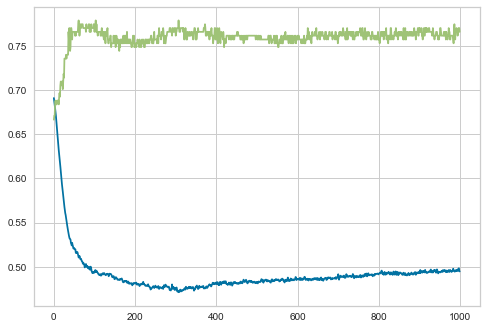

In [257]:
historico3.history.keys()
plt.plot(historico3.history['val_loss'])
plt.plot(historico3.history['val_binary_accuracy'])

### 5.2.1 - Previsão

In [249]:
# Verificando nos dados de teste
previsao3 = modelo3.predict(x_teste3)
previsao3 = (previsao3 > 0.5)

In [250]:
previsao3

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

### 5.2.2 - Métricas

In [251]:
print("Taxa de Acerto (Accuracy): {0:.6f}%".format(accuracy_score(y_teste3, previsao3)*100))

Taxa de Acerto (Accuracy): 76.623377%


In [252]:
print("Classification Report")
print(metrics.classification_report(y_teste3, previsao3, labels = [1, 0]));

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.43      0.54        74
           0       0.78      0.92      0.84       157

    accuracy                           0.77       231
   macro avg       0.75      0.68      0.69       231
weighted avg       0.76      0.77      0.75       231



In [253]:
# Criando uma Confusion Matrix
print("Confusion Matrix")
confusao3 = confusion_matrix(y_teste3, previsao3)
confusao3

Confusion Matrix


array([[145,  12],
       [ 42,  32]], dtype=int64)

### 5.2.3 - Avaliação

Problemas para classificar a classe igual a Positiva(1). Provavelmente por ter muito menos resultados positivos

## 5.4 Avaliação Geral

Os três modelos tiveram dificuldades para prever a classe Positiva (1).

Podemos melhorar os modelos mudando seus parametros de configuração ou fazendo a manipulação dos dados para que não tenhamos a classe rara, com isso pode-se eliminar um viés.

In [263]:
print('Precisão Modelo 1 - Regressão Logística: ',accuracy_score(y_teste1, previsao1)*100)
print('Precisão Modelo 2 - Random Forest: ',accuracy_score(y_teste2, previsao2)*100)
print('Precisão Modelo 3 - RNA: ',accuracy_score(y_teste3, previsao3)*100)

Precisão Modelo 1 - Regressão Logística:  76.19047619047619
Precisão Modelo 2 - Random Forest:  75.32467532467533
Precisão Modelo 3 - RNA:  76.62337662337663


Temos que a princípio a Rede Neural tem uma precisão maior equivalente a 76.62%

# Fim

### Obrigado - Marcus Rosa Godoi - <a href="https://www.linkedin.com/in/marcus-godoi/">linkedin.com/in/marcus-godoi</a>